## Temp

In [5]:
import pandas as pd
import seaborn as sn


In [145]:
df = pd.read_csv('data/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
df

# df.voltage.quantile([0.25,0.5,0.75])

,Unnamed: 0,date,time,temperature,voltage,current,pf,frequency,status
0,0,19/08/2021,02:31:39,1,1,12,1,1,normal
1,1,19/08/2021,02:31:52,1,1,12,1,1,normal
2,2,20/08/2021,03:24:44,22,225,0,0,50,normal
3,3,20/08/2021,03:25:19,23,225,0,0,49,normal
4,4,24/08/2021,12:06:52,37,237,22,0,50,normal
...,...,...,...,...,...,...,...,...,...
16759,16759,05/09/2021,05:25:02,31,1,-1,-1,-1,normal
16816,16816,05/09/2021,05:52:45,30,-1,-100,-1,-1,normal
16859,16859,05/09/2021,06:11:55,30,0,-1,-1,-1,normal
17020,17020,06/09/2021,07:29:33,30,-1,0,-1,-1,normal


In [142]:
# def clean(df):
df_temp =  df[['date','time','temperature']]	
df_temp = df_temp[df_temp['temperature'] > 1]
df_temp = df_temp[df_temp['temperature'] <= 100]
df_temp = df_temp[(df_temp['temperature'] >= 20) & (df_temp['temperature'] <= 50)]
df_temp

,date,time,temperature


array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

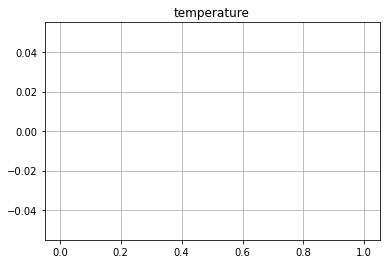

In [143]:
df_temp[['temperature']].hist(bins =100)

In [144]:
q25,q75 = df_temp['temperature'].quantile([0.25,0.75])
q5,q95 = df_temp['temperature'].quantile([0.05,0.95])

In [137]:
print(q75, q25,iqr*1.5)
iqr = q75 - q25


26.25 26.0 16.5


In [138]:
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print(lower_temp, upper_temp)

25.625 26.625


In [139]:
print(q5,q95)

26.0 27.0


## Vol

In [148]:
import pandas as pd

In [239]:
df = pd.read_csv('data/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]

df


,Unnamed: 0,date,time,temperature,voltage,current,pf,frequency,status
0,0,19/08/2021,02:31:39,1,1,12,1,1,normal
1,1,19/08/2021,02:31:52,1,1,12,1,1,normal
2,2,20/08/2021,03:24:44,22,225,0,0,50,normal
3,3,20/08/2021,03:25:19,23,225,0,0,49,normal
4,4,24/08/2021,12:06:52,37,237,22,0,50,normal
...,...,...,...,...,...,...,...,...,...
16759,16759,05/09/2021,05:25:02,31,1,-1,-1,-1,normal
16816,16816,05/09/2021,05:52:45,30,-1,-100,-1,-1,normal
16859,16859,05/09/2021,06:11:55,30,0,-1,-1,-1,normal
17020,17020,06/09/2021,07:29:33,30,-1,0,-1,-1,normal


In [241]:
# def clean(df):
focus = 'voltage'
df_temp =  df[['date','time', focus]]	
df_temp = df_temp[df_temp[focus] > 234]
df_temp = df_temp[df_temp[focus] <= 246]
# df_temp = df_temp[(df_temp['voltage'] >= 20) & (df_temp['voltage'] <= 50)]
df_temp

,date,time,voltage
4,24/08/2021,12:06:52,237
5,24/08/2021,12:07:04,237
6,24/08/2021,12:07:27,237
7,24/08/2021,12:07:39,237
8,24/08/2021,12:08:14,237
...,...,...,...
15156,05/09/2021,16:23:11,236
15157,05/09/2021,16:23:22,237
15158,05/09/2021,16:23:34,236
15159,05/09/2021,16:23:45,235


array([[<AxesSubplot:title={'center':'voltage'}>]], dtype=object)

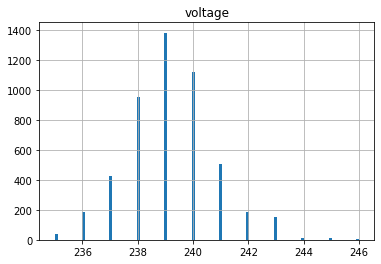

In [233]:
df_temp[[focus]].hist(bins =100)

In [234]:
q25,q75 = df_temp[focus].quantile([0.25,0.75])
q5,q95 = df_temp[focus].quantile([0.05,0.95])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical:',lower_temp, upper_temp)
print('alert:',q5,q95)

critical: 235.0 243.0
alert: 237.0 242.0


## Current

In [242]:
import pandas as pd

In [243]:
df = pd.read_csv('data/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]

df

,Unnamed: 0,date,time,temperature,voltage,current,pf,frequency,status
0,0,19/08/2021,02:31:39,1,1,12,1,1,normal
1,1,19/08/2021,02:31:52,1,1,12,1,1,normal
2,2,20/08/2021,03:24:44,22,225,0,0,50,normal
3,3,20/08/2021,03:25:19,23,225,0,0,49,normal
4,4,24/08/2021,12:06:52,37,237,22,0,50,normal
...,...,...,...,...,...,...,...,...,...
16759,16759,05/09/2021,05:25:02,31,1,-1,-1,-1,normal
16816,16816,05/09/2021,05:52:45,30,-1,-100,-1,-1,normal
16859,16859,05/09/2021,06:11:55,30,0,-1,-1,-1,normal
17020,17020,06/09/2021,07:29:33,30,-1,0,-1,-1,normal


In [244]:
# def clean(df):
focus = 'voltage'
df_temp =  df[['date','time', focus]]	
df_temp = df_temp[df_temp[focus] > 234]
df_temp = df_temp[df_temp[focus] <= 246]
# df_temp = df_temp[(df_temp['voltage'] >= 20) & (df_temp['voltage'] <= 50)]
df_temp

,date,time,voltage
4,24/08/2021,12:06:52,237
5,24/08/2021,12:07:04,237
6,24/08/2021,12:07:27,237
7,24/08/2021,12:07:39,237
8,24/08/2021,12:08:14,237
...,...,...,...
15156,05/09/2021,16:23:11,236
15157,05/09/2021,16:23:22,237
15158,05/09/2021,16:23:34,236
15159,05/09/2021,16:23:45,235


array([[<AxesSubplot:title={'center':'voltage'}>]], dtype=object)

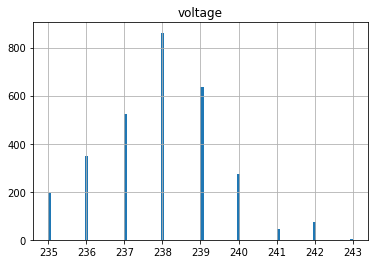

In [245]:
df_temp[[focus]].hist(bins =100)

In [246]:
q25,q75 = df_temp[focus].quantile([0.25,0.75])
q5,q95 = df_temp[focus].quantile([0.05,0.95])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical:',lower_temp, upper_temp)
print('alert:',q5,q95)

critical: 234.0 242.0
alert: 235.0 240.0
